In [83]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import sounddevice as sd

frame_length = 32
frame_shift = 16

In [84]:
babble = sf.read('resources/SpeechBabble.wav')
white = sf.read('resources/SpeechWhite.wav')

In [85]:
babble = sf.read("resources/SpeechBabble.wav")
babble_data = babble[0]
sampling_rate_babble = babble[1]

In [86]:
sampling_rate_babble

16000

In [87]:
white = sf.read("resources/SpeechWhite.wav")
white_data = white[0]
sampling_rate_white = white[1]

In [88]:
sampling_rate_white

16000

In [89]:
sampling_rate = sampling_rate_white

In [90]:
babble[0].shape

(69466,)

In [91]:
white[0].shape

(69466,)

In [92]:
sd.play(babble_data,sampling_rate_babble)

In [93]:
sd.play(white_data,sampling_rate_white)

In [94]:
def my_windowing(v_signal: np.ndarray, sampling_rate: int, frame_length: int, frame_shift: int) -> [np.ndarray, np.ndarray]:
    millis_per_sample = 1000 / sampling_rate
    frame_length_num_points = frame_length / millis_per_sample
    frame_shift_num_points = frame_shift / millis_per_sample
    num_frames = int(np.floor((len(v_signal) - frame_length_num_points) / frame_shift_num_points) + 1)
    m_frames = np.zeros((num_frames, int(frame_length_num_points)))
    v_time_frame = np.zeros(num_frames)
    for i in range(num_frames):
        start = int(i * frame_shift_num_points)
        end = int(i * frame_shift_num_points + frame_length_num_points)
        m_frames[i] = v_signal[start:end]
        v_time_frame[i] = (start + end)/(2*sampling_rate)
    return [m_frames, v_time_frame]

In [95]:
def compute_freq_axis(m_stft: np.ndarray):
    return np.linspace(0, sampling_rate//2, num=m_stft.shape[1])

def remove_upper_half_spectrum(m_stft: np.ndarray) -> np.ndarray:
    m_stft_new = m_stft[:, :(int(m_stft.shape[1]/2)+1)]
    return m_stft_new

In [96]:
def compute_stft(v_signal: np.ndarray, fs: int, frame_length: int, frame_shift: int, v_analysis_window: np.ndarray) -> [np.ndarray, np.ndarray, np.ndarray]:
    m_frames, v_time_frame = my_windowing(v_signal, fs, frame_length, frame_shift)
    m_stft_full = np.zeros(m_frames.shape, dtype=np.complex128)
    #v_analysis_window = v_analysis_window(m_frames.shape[1])
    for i in range(m_frames.shape[0]):
        m_stft_full[i] = np.fft.fft(m_frames[i]*v_analysis_window)
    #v_freq = np.fft.rfftfreq(m_stft_full.shape[1], 1/fs)
    m_stft = remove_upper_half_spectrum(m_stft_full)
    v_freq = compute_freq_axis(m_stft)
    return [m_stft, v_freq, v_time_frame]

In [97]:
from scipy.signal import get_window

frame_length_samples = (frame_length/1000)*sampling_rate

analysis_window = get_window('hann', int(frame_length_samples), fftbins=True)
frame_length_samples

512.0

In [98]:
m_stft_white, v_freq_white, v_time_frame_white = compute_stft(white_data, sampling_rate, frame_length, frame_shift, analysis_window)
m_stft_white.shape

(270, 257)

In [99]:
v_freq_white

array([   0.  ,   31.25,   62.5 ,   93.75,  125.  ,  156.25,  187.5 ,
        218.75,  250.  ,  281.25,  312.5 ,  343.75,  375.  ,  406.25,
        437.5 ,  468.75,  500.  ,  531.25,  562.5 ,  593.75,  625.  ,
        656.25,  687.5 ,  718.75,  750.  ,  781.25,  812.5 ,  843.75,
        875.  ,  906.25,  937.5 ,  968.75, 1000.  , 1031.25, 1062.5 ,
       1093.75, 1125.  , 1156.25, 1187.5 , 1218.75, 1250.  , 1281.25,
       1312.5 , 1343.75, 1375.  , 1406.25, 1437.5 , 1468.75, 1500.  ,
       1531.25, 1562.5 , 1593.75, 1625.  , 1656.25, 1687.5 , 1718.75,
       1750.  , 1781.25, 1812.5 , 1843.75, 1875.  , 1906.25, 1937.5 ,
       1968.75, 2000.  , 2031.25, 2062.5 , 2093.75, 2125.  , 2156.25,
       2187.5 , 2218.75, 2250.  , 2281.25, 2312.5 , 2343.75, 2375.  ,
       2406.25, 2437.5 , 2468.75, 2500.  , 2531.25, 2562.5 , 2593.75,
       2625.  , 2656.25, 2687.5 , 2718.75, 2750.  , 2781.25, 2812.5 ,
       2843.75, 2875.  , 2906.25, 2937.5 , 2968.75, 3000.  , 3031.25,
       3062.5 , 3093

In [100]:
m_stft_babble, v_freq_babble, v_time_frame_babble = compute_stft(babble_data, sampling_rate, frame_length, frame_shift, analysis_window)
m_stft_babble

array([[ 2.24318504e-01+0.j        , -2.99490664e-01+0.31501417j,
         4.60583169e-01+0.07571564j, ..., -2.52885456e-03+0.00068759j,
        -3.76048824e-03+0.00226932j,  9.05772090e-03+0.j        ],
       [ 2.59731196e+00+0.j        , -1.67323667e+00+0.45113781j,
         4.92255290e-01-0.04778538j, ..., -8.65745159e-04+0.00180188j,
        -4.70784731e-03-0.00147744j,  8.16568755e-03+0.j        ],
       [ 1.82303212e+00+0.j        , -1.11651476e+00-0.68615386j,
        -9.15609571e-02+0.3279407j , ..., -6.63653589e-03+0.00563022j,
         4.16419421e-03-0.00178793j, -1.31893778e-03+0.j        ],
       ...,
       [-4.54596509e-01+0.j        ,  2.89906462e-01+0.2122244j ,
         9.85109476e-02-0.2163552j , ..., -4.35223578e-04+0.00688083j,
         1.30575241e-02-0.01011795j, -2.31190972e-02+0.j        ],
       [ 1.62068051e-01+0.j        ,  1.21634936e-01+0.46050281j,
        -4.29774697e-01-0.34087693j, ...,  1.75608001e-03+0.01378777j,
        -6.11497526e-03-0.0130009j 

In [101]:
theta = 15

In [102]:
periodogram_white = np.square(np.abs(m_stft_white))
periodogram_white

array([[8.78322196e-02, 5.50681975e-01, 6.40510612e-01, ...,
        8.35863012e-02, 4.31717371e-03, 9.65159688e-02],
       [1.85751615e-01, 2.55483127e-01, 1.24010432e-01, ...,
        9.73511093e-02, 2.18708030e-03, 5.81806039e-05],
       [1.28475138e+00, 6.31802365e-01, 3.33701606e-01, ...,
        2.38792404e-01, 1.20464230e-01, 1.70434554e-01],
       ...,
       [5.00989348e-01, 1.91452589e-01, 2.45297774e-02, ...,
        3.62572189e-02, 1.36001369e-01, 1.28073924e-01],
       [6.56309557e-01, 2.37813017e-01, 2.31437602e-01, ...,
        1.82758629e-01, 4.68520783e-02, 5.19298481e-03],
       [6.18041407e-01, 2.41017058e-01, 7.50425587e-02, ...,
        9.63333792e-02, 5.31156495e-02, 4.14414005e-02]])

In [103]:
periodogram_babble = np.square(np.abs(m_stft_babble))
periodogram_babble

array([[5.03187912e-02, 1.88928585e-01, 2.17869713e-01, ...,
        6.86788546e-06, 1.92910964e-05, 8.20423080e-05],
       [6.74602940e+00, 3.00324628e+00, 2.44598714e-01, ...,
        3.99630318e-06, 2.43466472e-05, 6.66784531e-05],
       [3.32344610e+00, 1.71741233e+00, 1.15928508e-01, ...,
        7.57430064e-05, 2.05372058e-05, 1.73959688e-06],
       ...,
       [2.06657986e-01, 1.29084951e-01, 5.65139792e-02, ...,
        4.75351793e-05, 2.72871943e-04, 5.34492655e-04],
       [2.62660532e-02, 2.26857895e-01, 3.00903373e-01, ...,
        1.93186420e-04, 2.06416219e-04, 8.09594152e-05],
       [6.67880530e-01, 4.65637861e-01, 1.43259832e-01, ...,
        1.38112698e-05, 3.33801329e-04, 2.55498117e-04]])

In [132]:
initial_psd_noise_white = np.mean(np.square(np.abs(m_stft_white[0:m_stft_white.shape[0]//4])), axis=0)
initial_psd_noise_white

array([0.43330758, 0.21428108, 0.13925315, 0.13144126, 0.14900692,
       0.14863084, 0.16281128, 0.17238616, 0.16538679, 0.12641736,
       0.1497327 , 0.15158121, 0.13410725, 0.14695757, 0.18469035,
       0.20289064, 0.20504801, 0.23024628, 0.17911307, 0.15939401,
       0.1781916 , 0.19123093, 0.1936638 , 0.1522591 , 0.15328753,
       0.14919873, 0.16755341, 0.1647692 , 0.16037916, 0.15753398,
       0.16281978, 0.14636755, 0.15670831, 0.17332226, 0.17800113,
       0.14210183, 0.16814904, 0.1734067 , 0.17090862, 0.15273126,
       0.13990893, 0.12469592, 0.13111352, 0.14811556, 0.18424403,
       0.18197272, 0.17355113, 0.18201202, 0.15251306, 0.15841645,
       0.14397753, 0.16789465, 0.17673532, 0.16081757, 0.14618974,
       0.16868022, 0.19591423, 0.19808976, 0.19248012, 0.14249542,
       0.13087307, 0.14242856, 0.16091618, 0.17277596, 0.14770786,
       0.12655395, 0.13947526, 0.13893204, 0.13540869, 0.14861665,
       0.15826493, 0.14777262, 0.14184644, 0.14647306, 0.17206

In [134]:
initial_psd_noise_babble = np.mean(np.square(np.abs(m_stft_babble[0:m_stft_babble.shape[0]//4])), axis=0)
initial_psd_noise_babble

array([1.81741990e+00, 7.37251755e-01, 1.04063632e-01, 5.77527216e-01,
       2.67060041e+00, 3.84096465e+00, 2.14477719e+00, 9.56998379e-01,
       9.95547331e-01, 1.58138881e+00, 2.80909739e+00, 3.32361260e+00,
       1.50006942e+00, 7.93889681e-01, 1.01282559e+00, 9.30311348e-01,
       8.36524428e-01, 8.11035160e-01, 7.46792803e-01, 1.04309489e+00,
       8.46506056e-01, 4.57955441e-01, 4.80136276e-01, 4.02749281e-01,
       2.31315938e-01, 2.18178923e-01, 1.87090044e-01, 2.04049015e-01,
       1.36027406e-01, 6.21106681e-02, 8.24631327e-02, 8.75623252e-02,
       7.72083848e-02, 8.33522890e-02, 8.17075071e-02, 1.02937546e-01,
       2.36260779e-01, 2.84441995e-01, 1.12418304e-01, 1.13336307e-01,
       1.16932818e-01, 1.20633227e-01, 9.36905477e-02, 7.34563860e-02,
       8.72884888e-02, 1.30651682e-01, 1.03719238e-01, 5.13221490e-02,
       3.53570666e-02, 2.85907293e-02, 5.08156469e-02, 4.88564476e-02,
       2.80889081e-02, 1.86660102e-02, 2.53490091e-02, 2.47999449e-02,
      

In [135]:
initial_q = np.zeros(m_stft_white.shape[1])
initial_q

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [136]:
def compute_spp_internal(periodogram, initial_psd_noise, theta, l):
    exp_numerator = (-1)*periodogram[l]*theta
    exp_denominator = initial_psd_noise*(1+theta)
    exp = np.exp(exp_numerator/exp_denominator)
    arg = 1+(1+theta)*exp
    return 1/arg

In [137]:
def compute_spp(periodogram, initial_psd_noise, initial_q, theta):
    m_spp = np.zeros(periodogram.shape)
    m_noise_psd = np.zeros(periodogram.shape)
    for l in range(periodogram.shape[0]):
        m_spp[l] = compute_spp_internal(periodogram, initial_psd_noise, theta, l)
        initial_q = 0.9*initial_q + 0.1*m_spp[l]
        noise_periodogram = m_spp[l]*initial_psd_noise + (1 - m_spp[l]*periodogram[l])
        m_noise_psd[l] = 0.8*initial_psd_noise + 0.2*noise_periodogram
        initial_psd_noise = m_noise_psd[l]
    return m_spp, m_noise_psd

In [140]:
m_spp_white, m_noise_psd_white= compute_spp(periodogram_white, initial_psd_noise_white, initial_q, theta)
m_spp_white

C:\Users\aonti\AppData\Local\Temp/ipykernel_5384/1279786430.py:4: RuntimeWarning: overflow encountered in exp
  exp = np.exp(exp_numerator/exp_denominator)


array([[0.07026957, 0.41016025, 0.82339908, ..., 0.12329788, 0.06165357,
        0.13967664],
       [0.07894062, 0.11145374, 0.09409891, ..., 0.07989018, 0.05925222,
        0.05883448],
       [0.28681168, 0.17785856, 0.1234535 , ..., 0.09571152, 0.07579486,
        0.08350678],
       ...,
       [0.08917534, 0.06895517, 0.06003503, ..., 0.06062235, 0.06584504,
        0.06542642],
       [0.10111998, 0.07163512, 0.07121728, ..., 0.06842451, 0.06115911,
        0.05907855],
       [0.09811632, 0.07182187, 0.06260439, ..., 0.06371664, 0.06147704,
        0.06088645]])

In [143]:
np.min(m_noise_psd_white)

-147.18660333510456

In [146]:
m_spp_babble, m_noise_psd_babble= compute_spp(periodogram_babble, initial_psd_noise_babble, initial_q, theta)
m_spp_babble

C:\Users\aonti\AppData\Local\Temp/ipykernel_5384/1279786430.py:4: RuntimeWarning: overflow encountered in exp
  exp = np.exp(exp_numerator/exp_denominator)


array([[0.06027713, 0.0736216 , 0.30792888, ..., 0.06152481, 0.06914721,
        0.10226544],
       [0.73157637, 0.68053108, 0.12537579, ..., 0.05882457, 0.05882985,
        0.05884083],
       [0.75594551, 0.55462147, 0.0748191 , ..., 0.05883438, 0.05882647,
        0.05882378],
       ...,
       [0.10197814, 0.06589121, 0.0616479 , ..., 0.05882585, 0.05883687,
        0.05884965],
       [0.06184499, 0.07160148, 0.07537586, ..., 0.05883297, 0.05883362,
        0.05882748],
       [0.15662381, 0.08747797, 0.06623662, ..., 0.0588242 , 0.05883984,
        0.05883601]])

In [145]:
np.max(m_noise_psd_babble)

3.31775903647554

1.1) In our case we can listen to the audio and determine that the first second of the audio is noise only. So we can assume there is no contribution from speech to the signal, and thus estimate the initial noise PSD to be the average of the first second audio signal.

For the initial smoothed posterior probability we can initialize it to zero since there is no speech during the first second of the audio signal.

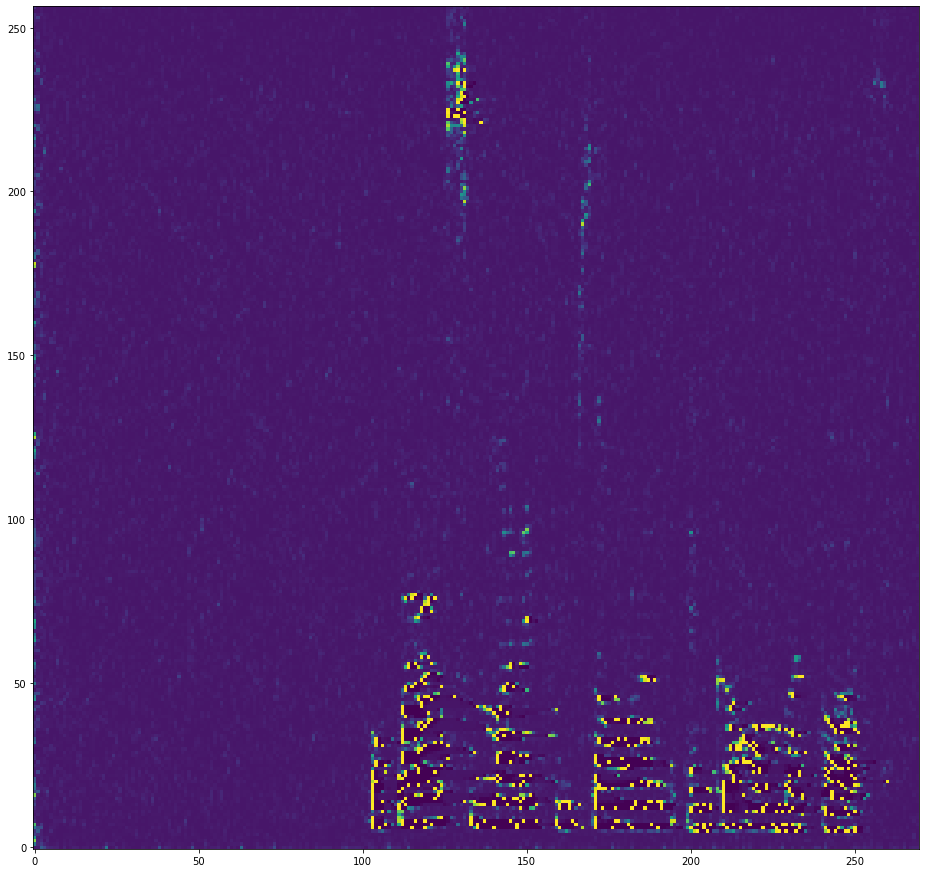

In [150]:
fig = plt.figure()
fig.set_size_inches(26.5, 15.5)
plt.imshow(m_spp_white.T, origin='lower')

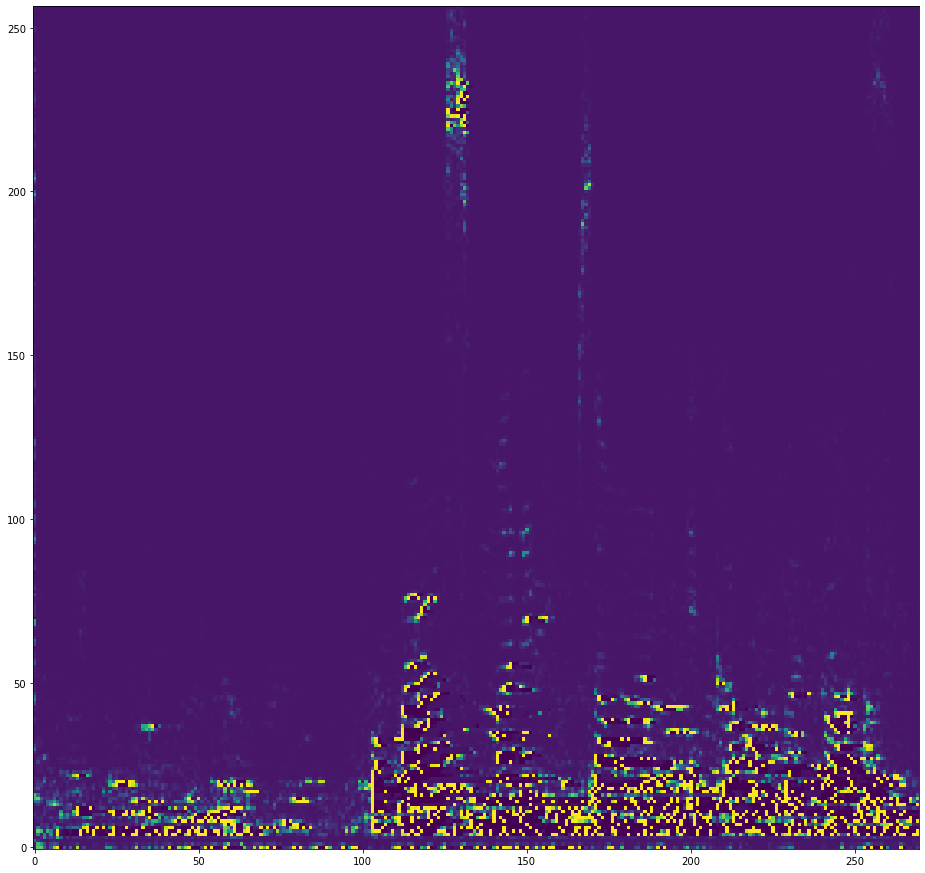

In [151]:
fig = plt.figure()
fig.set_size_inches(26.5, 15.5)
plt.imshow(m_spp_babble.T, origin='lower')

1.2.a) High values, close to 1 for both audios.

1.2.b) For the white noise the values are close to zero in all frequencies. For the babble noise we can see some high values
at lower frequencies and the rest close to zero.

In [152]:
def plot_spectrogram(signal):
    m_stft, v_freq, v_time_frame = compute_stft(signal, sampling_rate, frame_length, frame_shift, analysis_window)

    fig = plt.figure()
    fig.set_size_inches(26.5, 15.5)
    ax = fig.add_subplot(111)
    im = ax.imshow(10*np.log10(np.maximum(np.square(np.abs(m_stft.T)), 10**(-15))),
                   cmap='viridis', origin='lower', extent=[v_time_frame[0], v_time_frame[-1], v_freq[0],
                                                           sampling_rate//2], aspect='auto')
    fig.colorbar(im, orientation="vertical", pad=0.2)

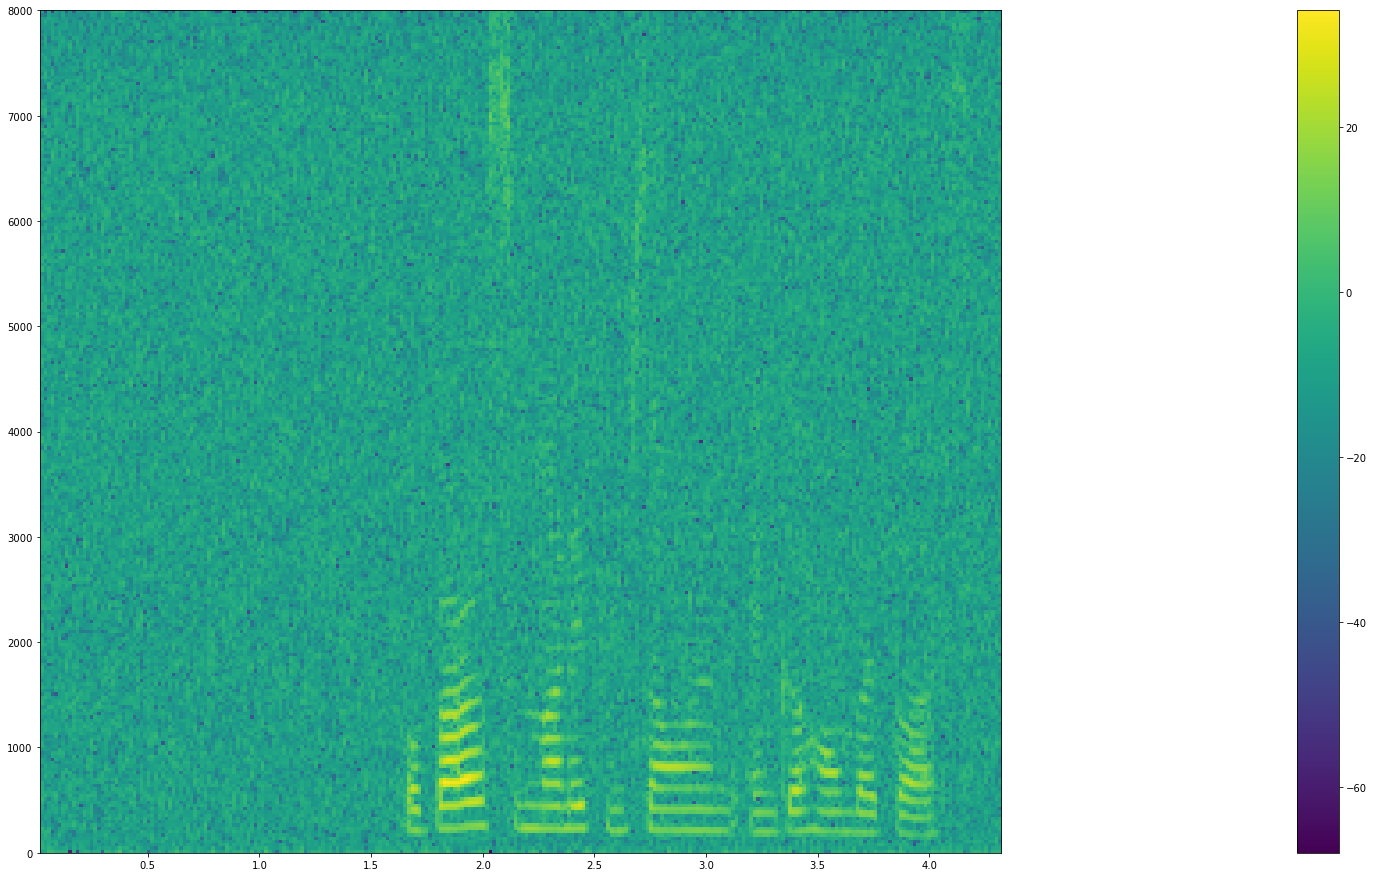

In [153]:
plot_spectrogram(white_data)

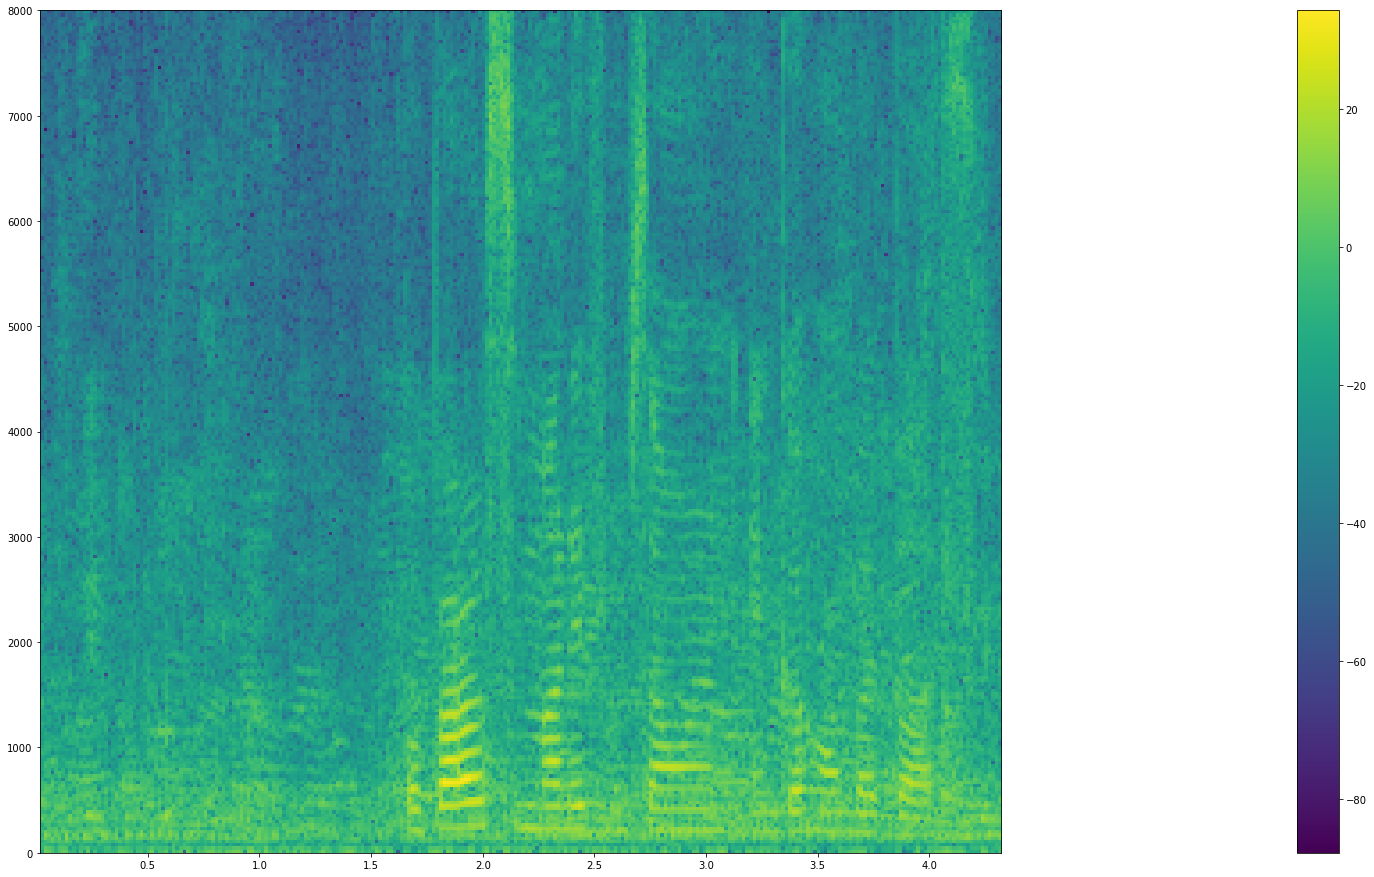

In [154]:
plot_spectrogram(babble_data)

1.2.c) Yes. we see that the images of the SPP and spectrogram are similar in shape. For example we can see the harmonics and noise areas in both images.

In [156]:
def plot_spectrogram_nostft(m_stft, v_time_frame, v_freq):
    fig = plt.figure()
    fig.set_size_inches(26.5, 15.5)
    ax = fig.add_subplot(111)
    im = ax.imshow(10*np.log10(np.maximum(np.square(np.abs(m_stft.T)), 10**(-15))),
                   cmap='viridis', origin='lower', extent=[v_time_frame[0], v_time_frame[-1], v_freq[0],
                                                           sampling_rate//2], aspect='auto')
    fig.colorbar(im, orientation="vertical", pad=0.2)

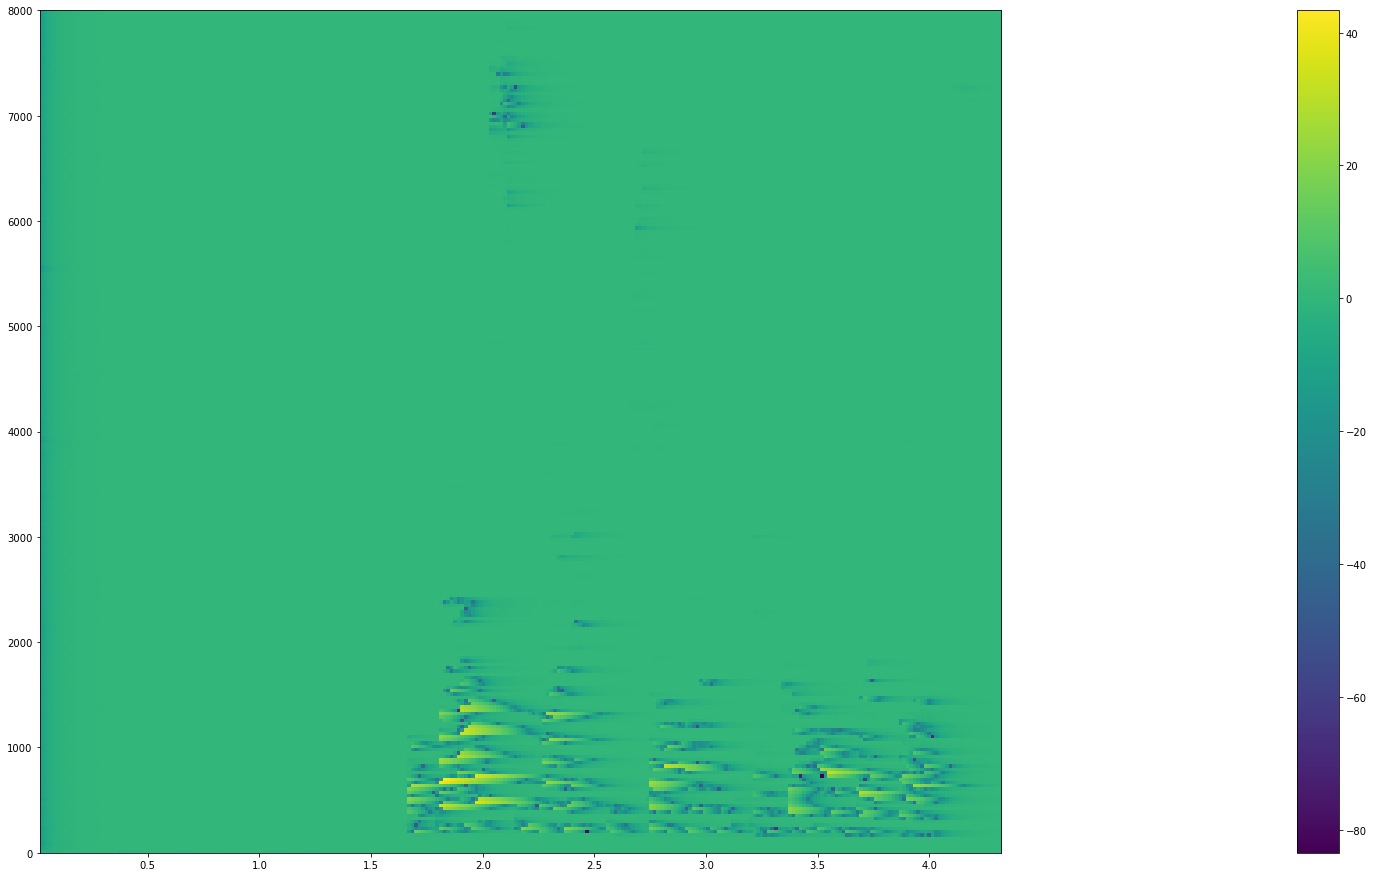

In [157]:
plot_spectrogram_nostft(m_noise_psd_white, v_time_frame_white, v_freq_white)

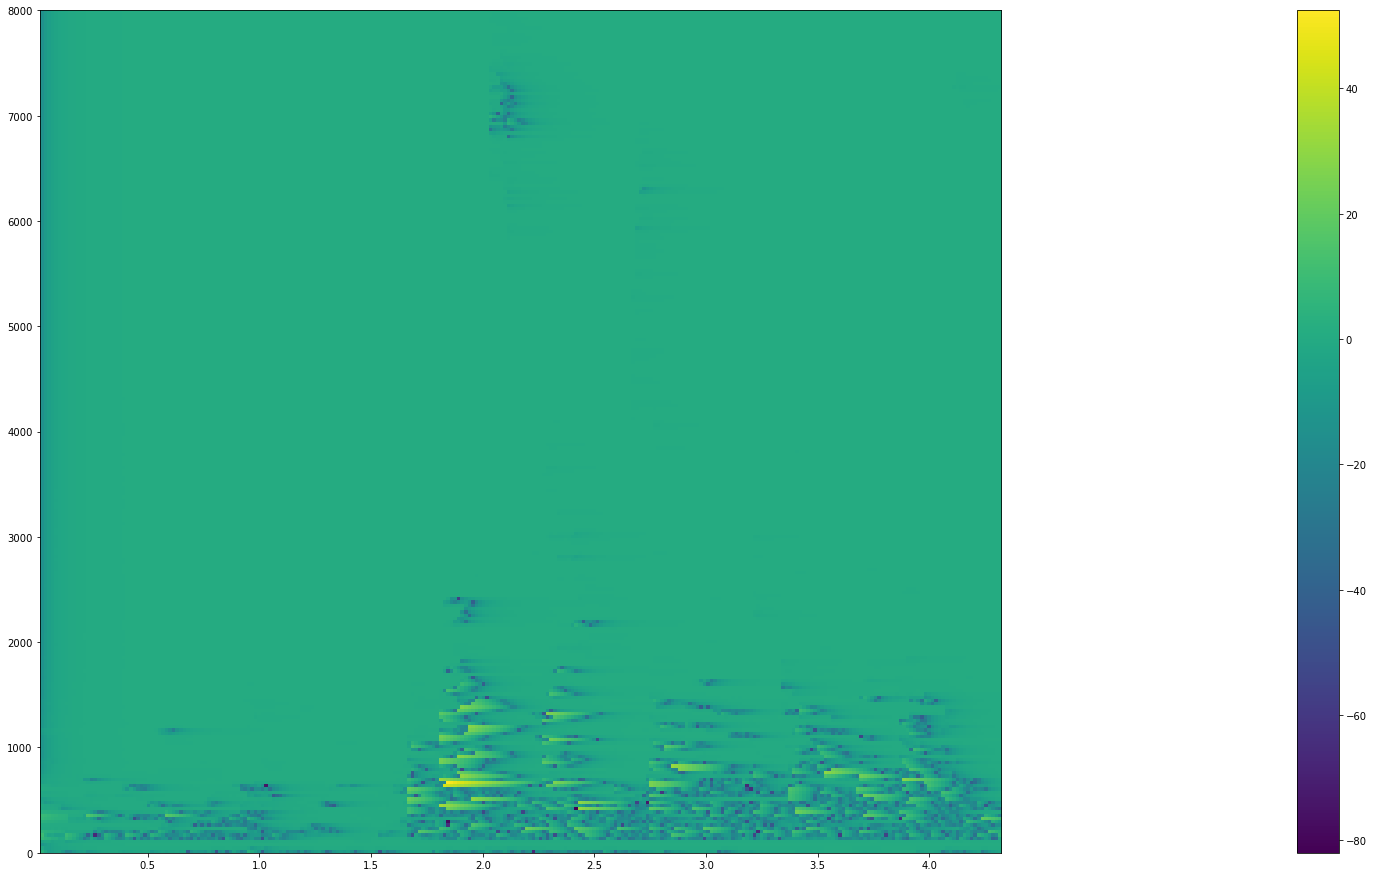

In [158]:
plot_spectrogram_nostft(m_noise_psd_babble, v_time_frame_babble, v_freq_babble)

1.3.a) good.

1.3.b) Yes, we can see the speech presence too.

1.3.c) A consequence is if we use the noise PSD to suppress noise from a speech signal and we see components that belong to the speech we might also suppress the speech signal.
